In [44]:
#Importing libs
import pandas as pd
import regex
import emoji
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [140]:
#Creating dataframe
df = pd.read_excel(r'C:\Users\USER\Desktop\Whatsapp\whatspan.xlsx')
df.tail(5)

Fecha             Autor  \
39987 2022-09-09           Stig AG   
39988 2022-09-09           Stig AG   
39989 2022-09-09           Stig AG   
39990 2022-09-09   Alejandro Veliz   
39991 2022-09-09               Dmh   

                                                 Mensaje  
39987   Además había más casas chidas y fueron los ún...  
39988                                   Jajajajajajajaja  
39989   Los pinches Velaryon valieron cake, y se pusi...  
39990                               <Multimedia omitido>  
39991   Pues si wey era la única persona viva que vio...

In [4]:
#Total messages
total_messages = df.shape[0]
print(total_messages)

39992


In [7]:
#Total of media messages
media_messages = df[df['Mensaje'] == ' <Multimedia omitido>'].shape[0]
print(media_messages)

2818


In [17]:
#Añadiendo variables cuantitativas
media_messages_df = df[df['Mensaje'] == ' <Multimedia omitido>']
messages_df = df.drop(media_messages_df.index)
messages_df['Total letras'] = messages_df['Mensaje'].apply(lambda s : len(str(s)))
messages_df['Total palabras'] = messages_df['Mensaje'].apply(lambda s : len(str(s).split(' '))-1)
messages_df["Cuenta mensaje"]=1
messages_df.head(10)

Fecha             Autor  \
1  2022-10-01           Stig AG   
2  2022-10-01           Stig AG   
4  2022-10-01   Alejandro Veliz   
5  2022-10-01           Armando   
6  2022-10-01   Alejandro Veliz   
7  2022-10-01           Stig AG   
8  2022-10-01         Bonnie BB   
9  2022-10-01           Stig AG   
10 2022-10-01   Alejandro Veliz   
11 2022-10-01   Alejandro Veliz   

                                              Mensaje  Total letras  \
1                                        Esta perrona            13   
2                             Nenes, vean la de Smile            24   
4               Cámara mis tibios saquen los porteros            38   
5      El Bonales ayer se hizo bien wey con el cambio            47   
6                                     Qué buena qualy            16   
7    C sabe que checo es el mejor en circuitos urb...            50   
8                                                 Uwu             4   
9                  Metanle a que mañana gana chequito            35   
10                                 Puto equipo mierda            19   
11                 Wey que se vaya alv liverpool neta            35   

    Total palabras  Cuenta mensaje  
1                2               1  
2                5               1  
4                6               1  
5               10               1  
6                3               1  
7               10               1  
8                1               1  
9                6               1  
10               3               1  
11               7               1

In [32]:
summary = messages_df[['Autor', 'Total palabras','Cuenta mensaje']].groupby('Autor').sum()
summary['Avg palabras'] = summary['Total palabras'] / summary['Cuenta mensaje']
summary

Total palabras  \
Autor                                                                
 Alejandro Veliz                                             65144   
 Armando                                                     65534   
 Ben Galaxy                                                     15   
 Bonnie BB                                                   39047   
 Dmh                                                         30720   
 Micro                                                          19   
 Pedro dany                                                      2   
 Stig AG                                                     17396   
 ‎Alejandro Veliz añadió a Armando.                              0   
 ‎Alejandro Veliz añadió a Stig AG.                              0   
 ‎Alejandro Veliz desactivó los mensajes tempor...               0   
 ‎Alejandro Veliz eliminó a Armando                              0   
 ‎Alejandro Veliz eliminó a Stig AG                              0   
Arturo                                                          62   
Mike                                                           254   

                                                    Cuenta mensaje  \
Autor                                                                
 Alejandro Veliz                                             10082   
 Armando                                                     10079   
 Ben Galaxy                                                      3   
 Bonnie BB                                                    8048   
 Dmh                                                          5223   
 Micro                                                           6   
 Pedro dany                                                      2   
 Stig AG                                                      3684   
 ‎Alejandro Veliz añadió a Armando.                              2   
 ‎Alejandro Veliz añadió a Stig AG.                              3   
 ‎Alejandro Veliz desactivó los mensajes tempor...               2   
 ‎Alejandro Veliz eliminó a Armando                              2   
 ‎Alejandro Veliz eliminó a Stig AG                              3   
Arturo                                                          18   
Mike                                                            17   

                                                    Avg palabras  
Autor                                                             
 Alejandro Veliz                                        6.461416  
 Armando                                                6.502034  
 Ben Galaxy                                             5.000000  
 Bonnie BB                                              4.851764  
 Dmh                                                    5.881677  
 Micro                                                  3.166667  
 Pedro dany                                             1.000000  
 Stig AG                                                4.722041  
 ‎Alejandro Veliz añadió a Armando.                     0.000000  
 ‎Alejandro Veliz añadió a Stig AG.                     0.000000  
 ‎Alejandro Veliz desactivó los mensajes tempor...      0.000000  
 ‎Alejandro Veliz eliminó a Armando                     0.000000  
 ‎Alejandro Veliz eliminó a Stig AG                     0.000000  
Arturo                                                  3.444444  
Mike                                                   14.941176

There are 678782 words in all the messages.


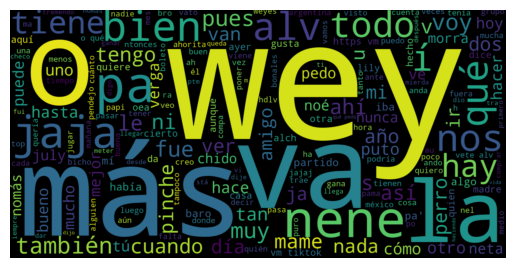

<Figure size 2000x1000 with 0 Axes>

In [87]:
messages_df_2 = messages_df.copy()
messages_df_2['Mensaje'] = messages_df_2["Mensaje"].apply(lambda s : str(s))
messages_df_2 = messages_df_2[messages_df_2["Total palabras"] > 4]
text = " ".join(review for review in messages_df_2.Mensaje)
text = text.lower()
banned_words = [' y ', ' de ', ' que ', ' el ', ' la ', ' lo ', ' en ', 'Y ','pero','lo','see','si ','ya ','un ','por ', ' e ', 'la ', 'le ','se ',' e','con',' s',' te ', 'una ','del ', 'mi ','al ', 'para ', 'como ', 'jajaja ', 'yo','tu','porque']
for i in banned_words:
    text = text.replace(i,'')
print ("There are {} words in all the messages.".format(len(text)))
# Generate a word cloud image
wordcloud = WordCloud(background_color="black", width=2000, height=1000).generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(20,10))
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_16092\518429541.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummy_df['Mensaje'] = dummy_df["Mensaje"].apply(lambda s : str(s))


Author name  Alejandro Veliz


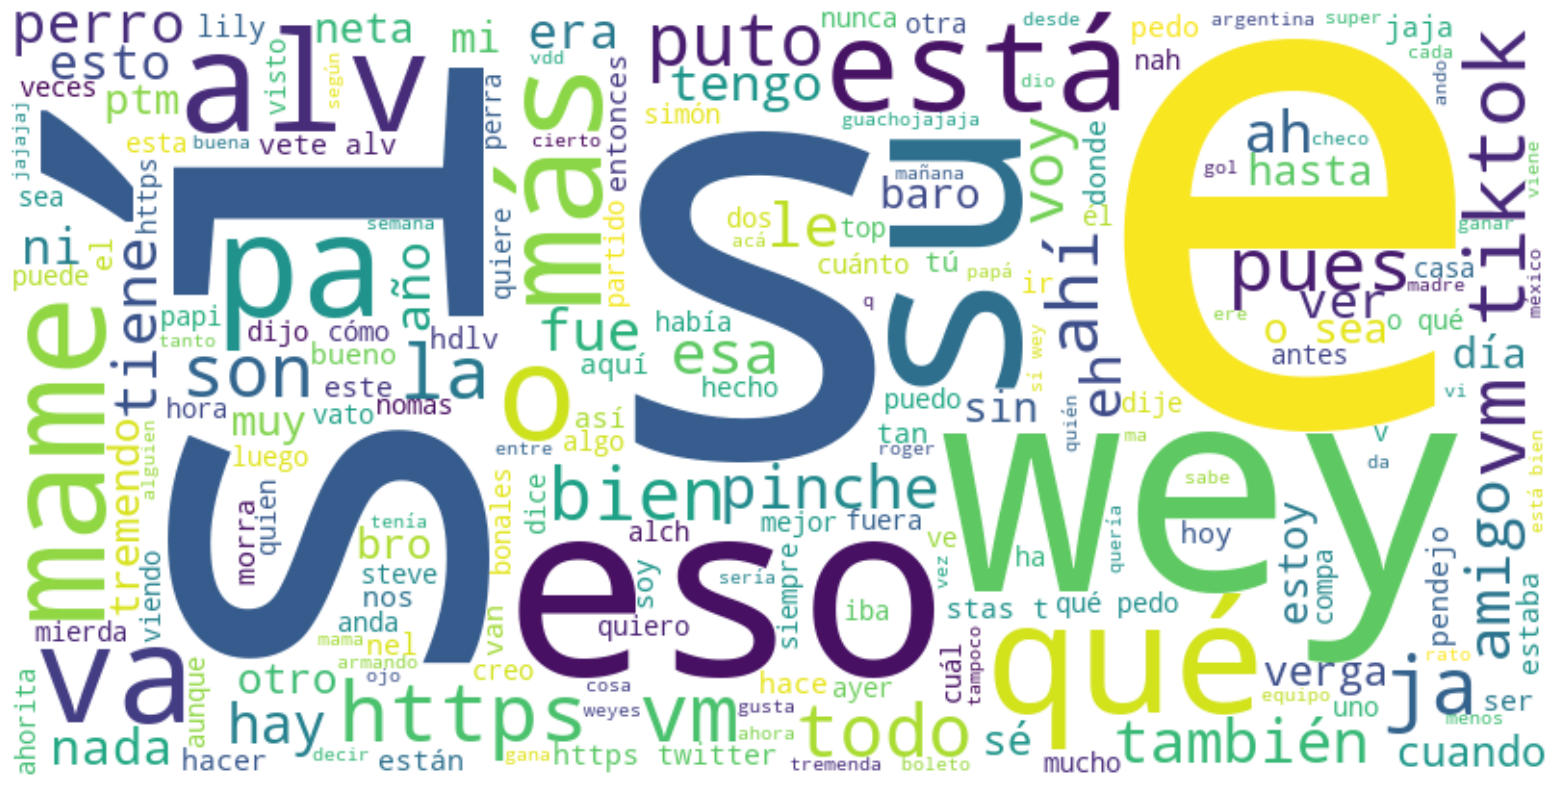

C:\Users\USER\AppData\Local\Temp\ipykernel_16092\518429541.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummy_df['Mensaje'] = dummy_df["Mensaje"].apply(lambda s : str(s))


Author name  Armando


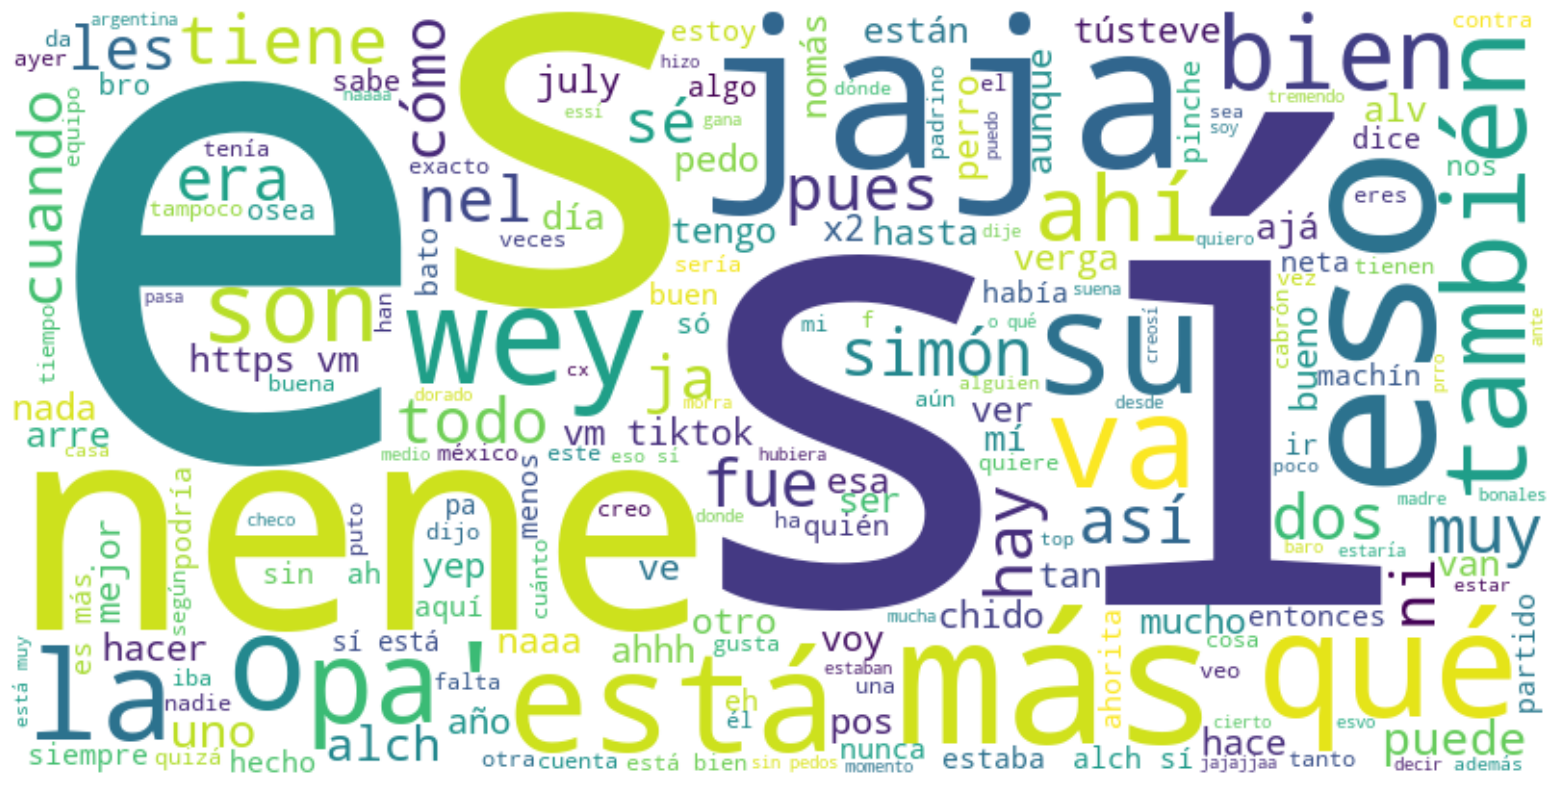

C:\Users\USER\AppData\Local\Temp\ipykernel_16092\518429541.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummy_df['Mensaje'] = dummy_df["Mensaje"].apply(lambda s : str(s))


Author name  Bonnie BB


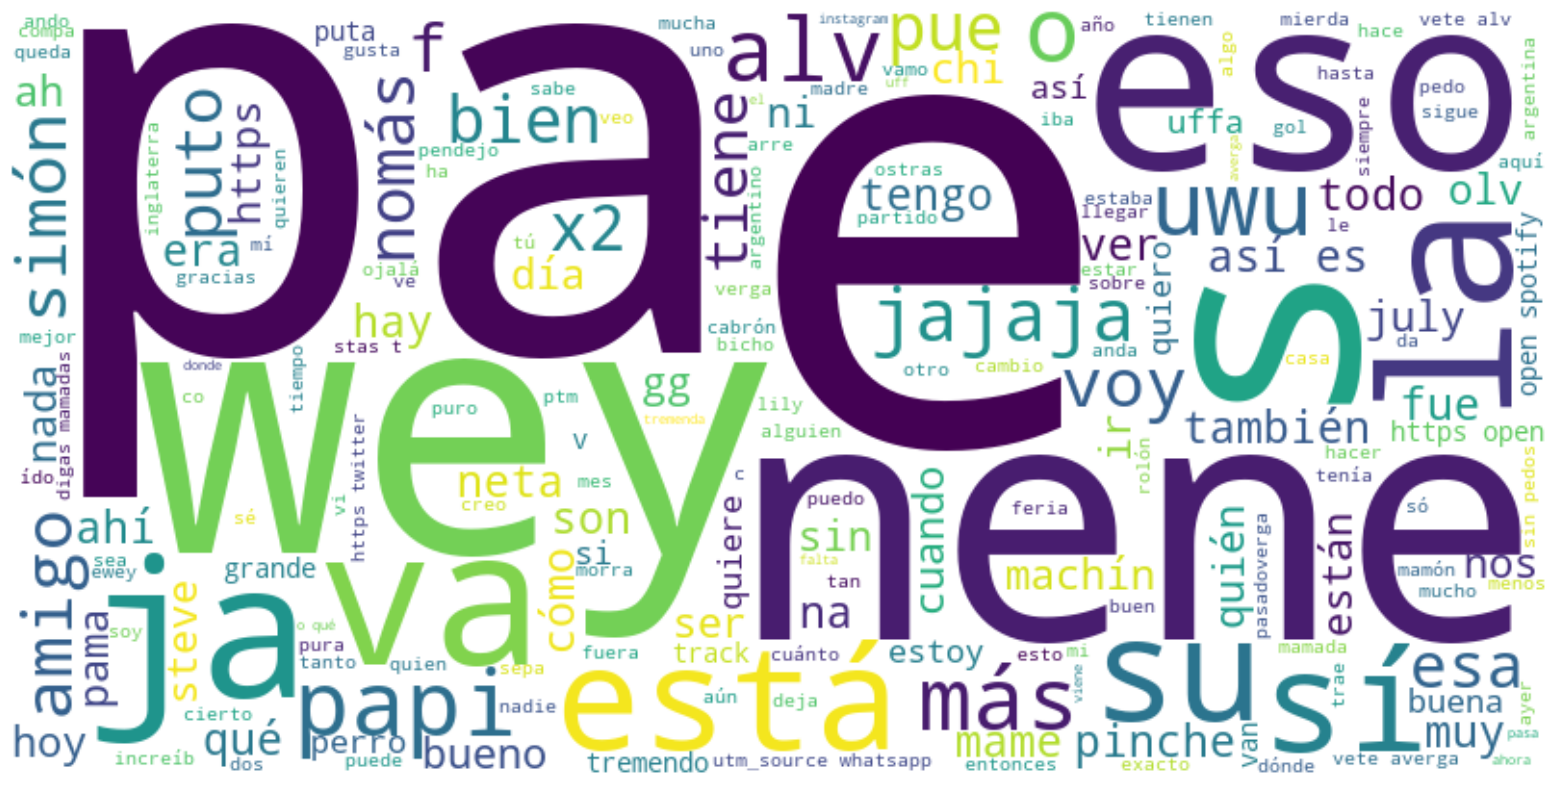

C:\Users\USER\AppData\Local\Temp\ipykernel_16092\518429541.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummy_df['Mensaje'] = dummy_df["Mensaje"].apply(lambda s : str(s))


Author name  Dmh


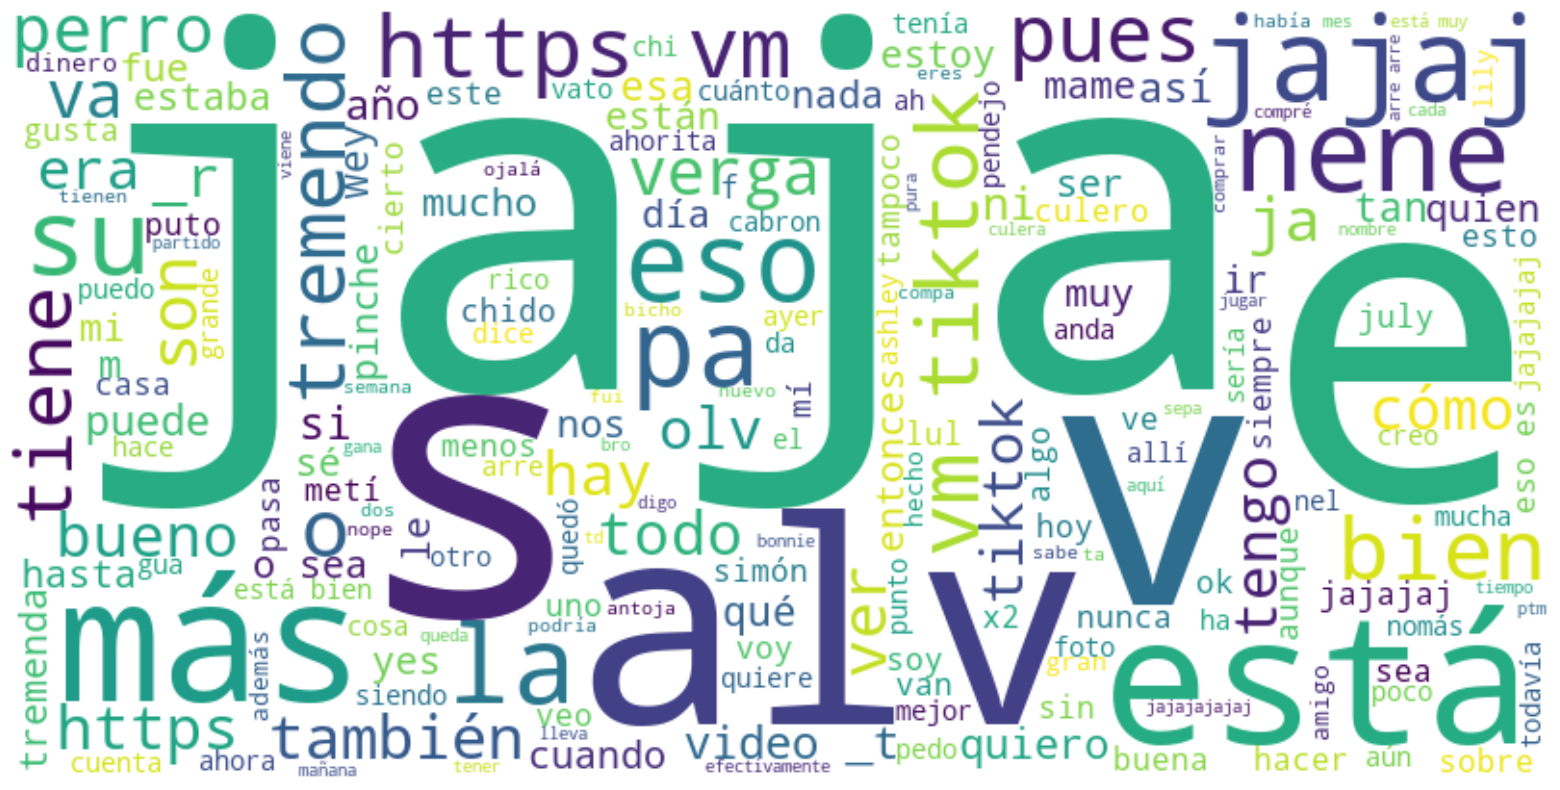

C:\Users\USER\AppData\Local\Temp\ipykernel_16092\518429541.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummy_df['Mensaje'] = dummy_df["Mensaje"].apply(lambda s : str(s))


Author name  Stig AG


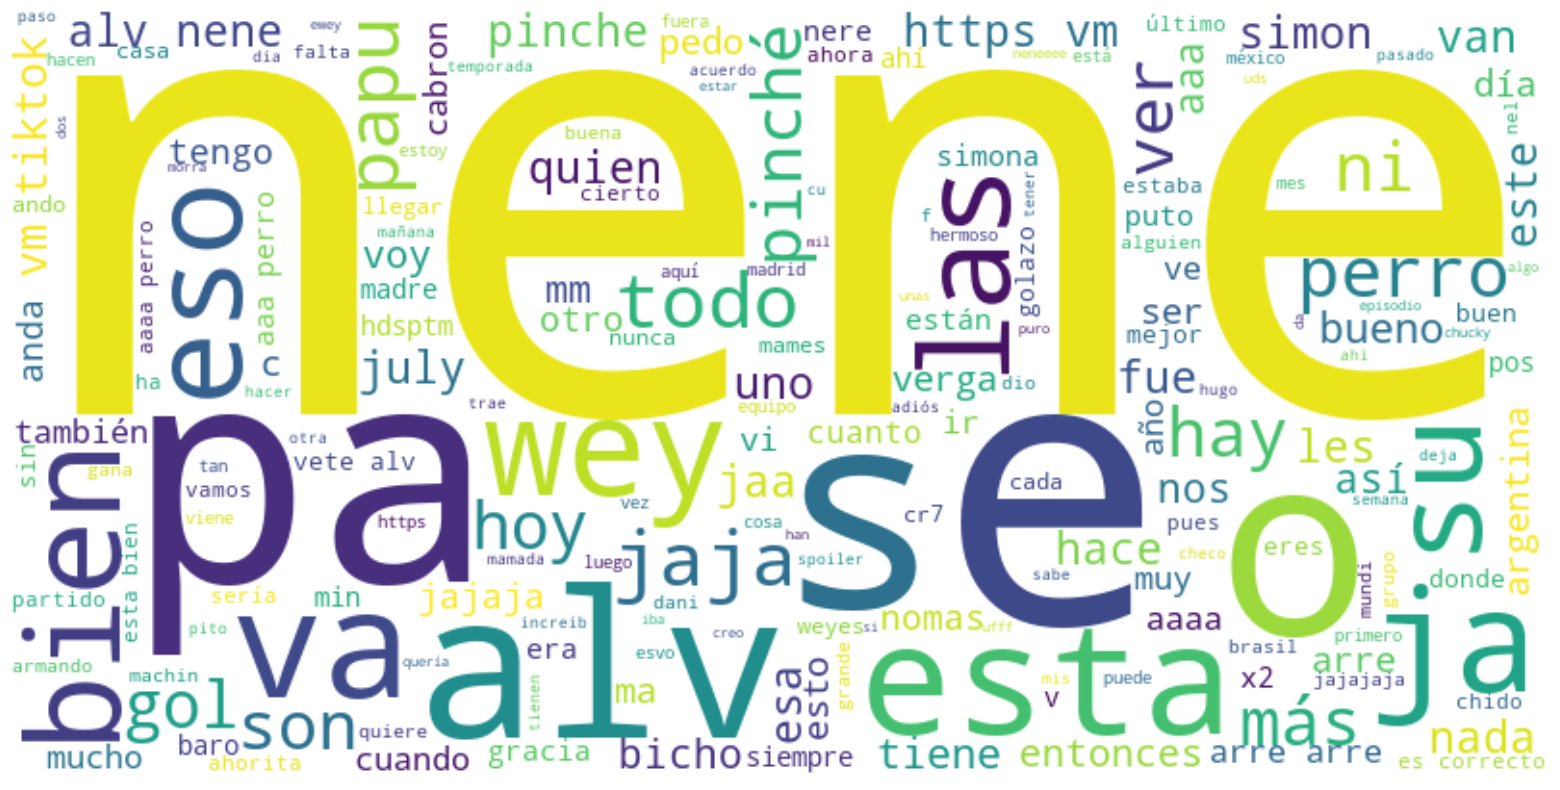

In [115]:
l = [" Alejandro Veliz", " Armando", " Bonnie BB", " Dmh", " Stig AG"]
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Autor'] == l[i]]
  dummy_df['Mensaje'] = dummy_df["Mensaje"].apply(lambda s : str(s))
  text = " ".join(review for review in dummy_df.Mensaje)
  text = text.lower()
  banned_words = [' y ', ' de ', ' que ', ' el ', ' la ', ' lo ', ' en ', 'Y ','pero','lo','see','si ','ya ','un ','por ', ' e ', 'la ', 'le ','se ','con ',' te ', 'una ','del ', 'mi ','al ', 'para ', 'como ', 'jajaja ', 'yo','tu','porque']
  for w in banned_words:
    text = text.replace(w,'')
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)
  #Display the generated image   
  plt.figure( figsize=(20,10))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

In [152]:
#Vocabulario por autor
autors = [" Alejandro Veliz", " Armando", " Bonnie BB", " Dmh", " Stig AG"]
for autor in autors:
    palabras = []
    d_df = df[df['Autor'] == autor]
    text2 = " ".join(review for review in d_df.Mensaje)
    text2 = text2.lower()
    words = list(text2.split())
    result = []
    for item in words:
        if item not in result:
            result.append(item)
    print(autor)
    print(len(result))
    


 Alejandro Veliz
11437
 Armando
10846
 Bonnie BB
7695
 Dmh
6983
 Stig AG
4154
